#### 무게를 찾기
- 목표: 농어(perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋: fish.csv
- 피쳐/속성: length
- 타겟/라벨: wieght


[1] 데이터 준비 및 피쳐/타겟 분석

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_FILE= '../data/fish.csv'

In [4]:
# perch의 무게와 길이만 추출
fish_DF= pd.read_csv(DATA_FILE, usecols=[1,2])
fish_DF= fish_DF.iloc[74:128]     #농어행 추출
fish_DF= fish_DF.reset_index(drop=True)
print(fish_DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  54 non-null     float64
 1   Length  54 non-null     float64
dtypes: float64(2)
memory usage: 992.0 bytes
None


In [5]:
# 상관관계 분석
fish_DF.corr()   #-> 0.97로 상당히 강한 상관관계를 가짐

,Weight,Length
Weight,1.000000,0.971215
Length,0.971215,1.000000


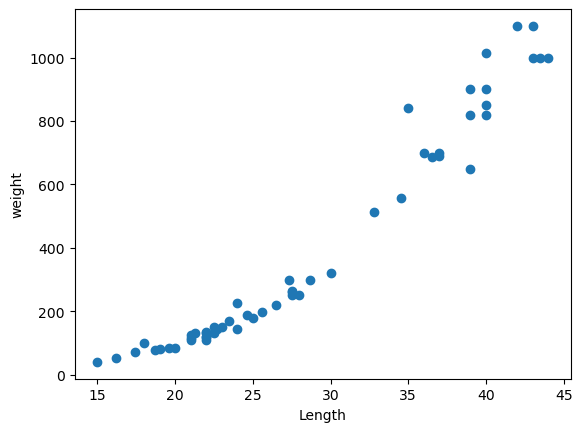

In [6]:
plt.scatter(fish_DF['Length'], fish_DF['Weight'])
plt.xlabel('Length')
plt.ylabel('weight')
# plt.legend()
plt.show()

[2] 학습 준비
- 학습 알고리즘: KNN Regressor
- 피쳐 스케일링
- 학습용/테스트용 데이터셋 분리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
feature= fish_DF[['Length']]
target= fish_DF['Weight']
print('feature', feature.shape)
print( 'target', target.shape)

feature (54, 1)
target (54,)


[2-2] 학습용 & 테스트용 데이터셋 분리
전체 데이터셋-> 학습용:테스트용
회귀 데이터셋이므로 데이터셋 구성요소에 대한 비율 고려X

In [9]:
X_train, X_test, Y_train ,Y_test= train_test_split(feature, target, test_size=.2,
                                                    random_state=10)
                                                    #모델 최적화위한 랜덤 고정


In [10]:
print( f'X_train: {X_train.shape}, {X_train.ndim}')
print( f'X_test: {X_test.shape}, {X_test.ndim}')
print( f'Y_train: {Y_train.shape}, {Y_train.ndim}')
print( f'Y_test: {Y_test.shape}, {Y_test.ndim}')

print(len(X_train), len(Y_train), len(X_test), len(Y_test))

X_train: (43, 1), 2
X_test: (11, 1), 2
Y_train: (43,), 1
Y_test: (11,), 1
43 43 11 11


In [11]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

[2-3] 피쳐 스케일링
수치형 피쳐-> 선형: minmaxScaler


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# 인스턴스 생성
mmscaler= MinMaxScaler()


In [14]:
# 스케일러에 데이터셋 전용에 속성값 설정-> 트레인용 데이터에 스케일링

mmscaler.fit(X_train)

MinMaxScaler()

In [15]:
mmscaler.min_, mmscaler.scale_, mmscaler.data_max_, mmscaler.data_min_ 

(array([-0.51724138]), array([0.03448276]), array([44.]), array([15.]))

In [16]:
# 학습용, 테스트용 데이터셋 스케일링 진행
X_train_scaled = mmscaler.transform(X_train)
X_test_scaled= mmscaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
# 모델 인스턴스 생성
model= KNeighborsRegressor()

# 학습 진행
model.fit(X_train_scaled, Y_train)

KNeighborsRegressor()

In [18]:
# 모델 파라미터 확인 (학습후 설정되는 매개변수)
# 피쳐 개수                 샘플개수                 사용한 함수(계산?)
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 43, 'euclidean', {})

[4] 최적의 K 찾기


In [19]:
scores={}
for k in range(1, model.n_samples_fit_+1):
    # 최근접 이웃의 개수 설정(하이퍼파라미터)
    model.n_neighbors=k

    # 성능평가
    score= model.score(X_test_scaled, Y_test)
    scores[k]=score  #dict형태로 k와 점수 묶어서 저장도 가능


In [20]:
a=list(scores.keys())
b=list(scores.values())

In [21]:
sorted(scores.items(), key=lambda x: x[1], reverse=True)
# (4, 0.9918501107265342),
#  (6, 0.9903860290665382),
#  (5, 0.9903453272718001),

[(4, 0.9918501107265342),
 (6, 0.9903860290665382),
 (5, 0.9903453272718001),
 (7, 0.9893272855449737),
 (8, 0.982950900145139),
 (1, 0.9817541415335572),
 (3, 0.9778630997270873),
 (12, 0.9773063713603024),
 (19, 0.9720352657835449),
 (20, 0.9703957789743284),
 (11, 0.9696618004047965),
 (9, 0.9692865758436912),
 (18, 0.9673611344444396),
 (10, 0.9650856318836707),
 (13, 0.9637379295995839),
 (21, 0.9635150008308436),
 (15, 0.9612900992702742),
 (22, 0.9570829356076344),
 (14, 0.9553300815881475),
 (17, 0.9543641319312612),
 (16, 0.9513295650411937),
 (23, 0.9451472896098011),
 (2, 0.9432704151826015),
 (24, 0.9269237125164177),
 (25, 0.9124359161891848),
 (26, 0.8909800844099216),
 (27, 0.8736365231357323),
 (28, 0.8542242139864746),
 (29, 0.8299418430799019),
 (30, 0.7949027860531859),
 (31, 0.7591203459308516),
 (32, 0.7223243336601962),
 (33, 0.6768884007363833),
 (34, 0.6354602944157512),
 (35, 0.5802400915253982),
 (36, 0.5205307584195931),
 (37, 0.447886992024652),
 (38, 0.3867

(0.9918501107265342, 43)

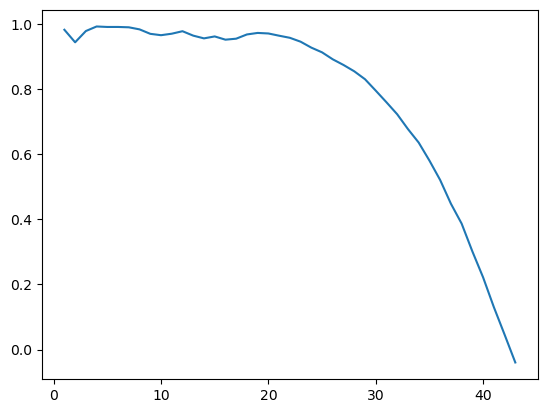

In [22]:
plt.plot(a,b)
max(b), len(a)

[5] 새로운 데이터의 무게 예측하기

In [23]:
# 최적의 K값 적용
model.n_neighbors=4

new_length= [[input('농어 길이: ')]]
print(new_length)

[['']]


In [24]:
# 예측 전 고려사항-> 1. 2차원의 형태를 가지고 있는가?(+이전 데이터의 형태 따라가기)
                  # 2. 데이터 스케일링은 진행했는가>
dataDF=pd.DataFrame(new_length, columns=['Length']) #데이터 형태 변환 (2차원 데이터프레임)
dataDF_scaled=mmscaler.transform(dataDF)            #스케일링


ValueError: could not convert string to float: ''

In [ ]:
# 예측
print(model.predict(dataDF_scaled))
index= model.kneighbors(dataDF_scaled, return_distance=False)
index=index.reshape(-1)

[1025.]


In [ ]:
X_train.iloc[index]  #scaling한 데이터의 인덱스이기 때문에 맞지 않음

,Length
53,44.0
52,43.5
51,43.0
50,43.0


In [ ]:
X_train_scaled[index] #원 데이터 파악 X

array([[1.        ],
       [0.98275862],
       [0.96551724],
       [0.96551724]])

In [ ]:
Y_train.index   #train_test_split으로 인덱스가 섞여 있음+ X데이터가 스케일링 과정을 거치면서 array로 바뀜(인덱스 사라짐)
                    # -> 스케일링 전에 reset_index로 훈련, 테스트 데이터 인덱스 재정렬

Index([34,  7,  6, 42,  2, 51, 43, 10, 37, 27, 18,  4,  1, 12, 48, 22, 30, 47,
       19, 32,  5, 13, 14, 44, 33, 24, 11, 41, 16, 52, 40, 50, 53,  8, 46, 29,
       25, 28, 49,  0, 15, 36,  9],
      dtype='int64')

In [ ]:
Y_train.index   #train_test_split으로 인덱스가 섞여 있음+ X데이터가 스케일링 과정을 거치면서 array로 바뀜(인덱스 사라짐)
                    # -> 스케일링 전에 reset_index로 훈련, 테스트 데이터 인덱스 재정렬

Index([34,  7,  6, 42,  2, 51, 43, 10, 37, 27, 18,  4,  1, 12, 48, 22, 30, 47,
       19, 32,  5, 13, 14, 44, 33, 24, 11, 41, 16, 52, 40, 50, 53,  8, 46, 29,
       25, 28, 49,  0, 15, 36,  9],
      dtype='int64')

In [ ]:
Y_train.index   #train_test_split으로 인덱스가 섞여 있음+ X데이터가 스케일링 과정을 거치면서 array로 바뀜(인덱스 사라짐)
                    # -> 스케일링 전에 reset_index로 훈련, 테스트 데이터 인덱스 재정렬

Index([34,  7,  6, 42,  2, 51, 43, 10, 37, 27, 18,  4,  1, 12, 48, 22, 30, 47,
       19, 32,  5, 13, 14, 44, 33, 24, 11, 41, 16, 52, 40, 50, 53,  8, 46, 29,
       25, 28, 49,  0, 15, 36,  9],
      dtype='int64')

In [ ]:
Y_train.index   #train_test_split으로 인덱스가 섞여 있음+ X데이터가 스케일링 과정을 거치면서 array로 바뀜(인덱스 사라짐)
                    # -> 스케일링 전에 reset_index로 훈련, 테스트 데이터 인덱스 재정렬

Index([34,  7,  6, 42,  2, 51, 43, 10, 37, 27, 18,  4,  1, 12, 48, 22, 30, 47,
       19, 32,  5, 13, 14, 44, 33, 24, 11, 41, 16, 52, 40, 50, 53,  8, 46, 29,
       25, 28, 49,  0, 15, 36,  9],
      dtype='int64')

In [ ]:
Y_train[index].sum()/model.n_neighbors #predict값과 일치-> 인덱스가 맞게 바뀜

1025.0

##### KNN Regressor

In [27]:
import pandas as pd
# 임의의 데이터
new_length = 4

# 2D DataFrame
dataDF=pd.DataFrame([[new_length]], columns=['Length'])
# 피쳐 스케일링
data_scaled=mmscaler.transform(dataDF)

In [28]:
# 예측
model.predict(data_scaled)

array([59.875])

=> 학습 데이터셋의 범위를 벗어난 더 큰 데이터, 더 작은 데이터의 경우 
정확한 예측이 불가능